<a href="https://colab.research.google.com/github/ferdevpy/kagglecompetitions/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Run All

##1. Aquisição de dados 

In [243]:
from google.colab import files
up=files.upload()

Saving kaggle.json to kaggle (3).json


In [244]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [245]:
#Importando Bibliotecas
! pip install kaggle
import kaggle
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew

In [246]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [247]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')


##2. Dataviz

In [248]:
print(train.head())
print('=='*50)
print(test.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [249]:
print(train.info())
print('=='*50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

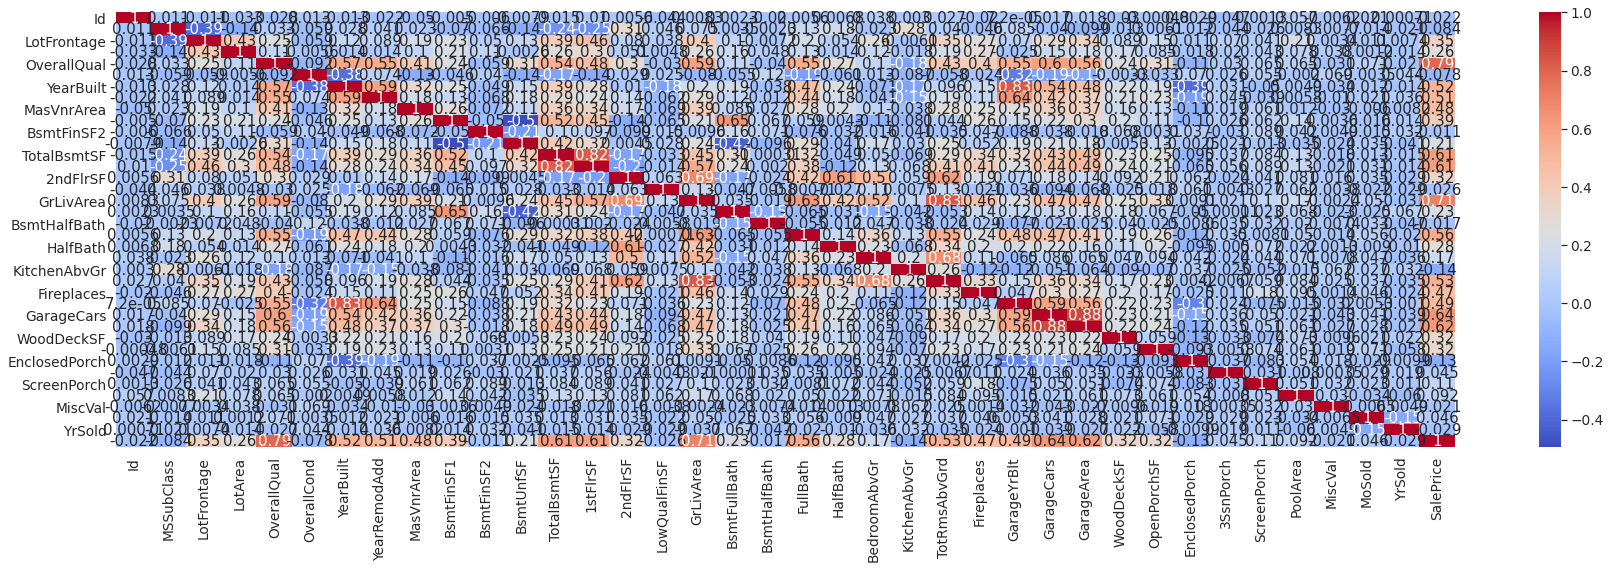

In [250]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)
plt.show()

In [251]:
corr=train.corr()

In [252]:
#selecionando apenas as variáveis cuja correlação com SalePrice é maior que 0.3
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [254]:
train=train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   OverallQual   1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   YearRemodAdd  1460 non-null   int64  
 4   MasVnrArea    1452 non-null   float64
 5   BsmtFinSF1    1460 non-null   int64  
 6   TotalBsmtSF   1460 non-null   int64  
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   GrLivArea     1460 non-null   int64  
 10  FullBath      1460 non-null   int64  
 11  TotRmsAbvGrd  1460 non-null   int64  
 12  Fireplaces    1460 non-null   int64  
 13  GarageYrBlt   1379 non-null   float64
 14  GarageCars    1460 non-null   int64  
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [256]:
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

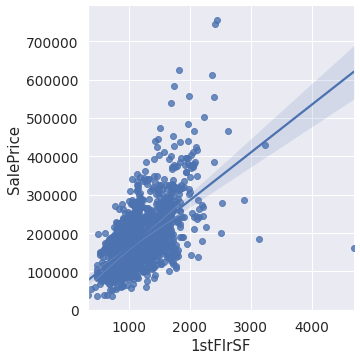

In [257]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) 
#vemos que 1stFlrSF possui grande relação com SalePrice

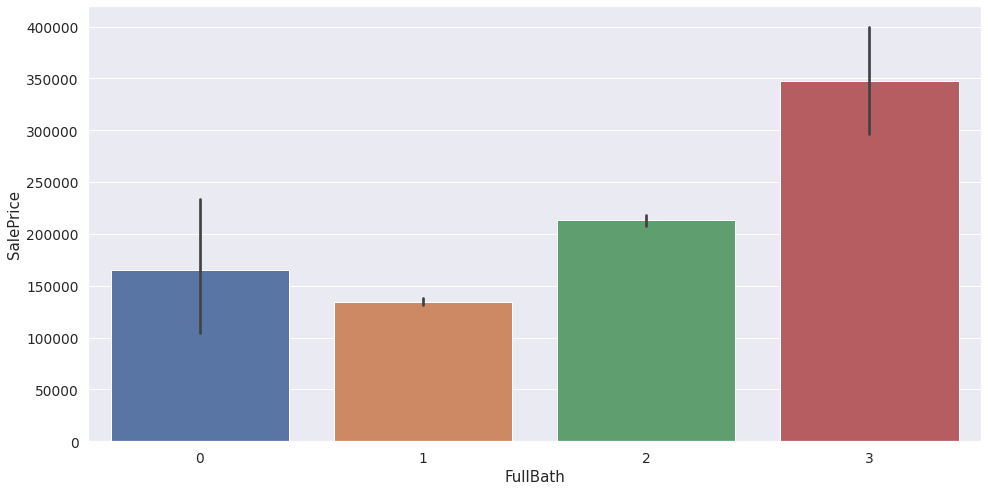

In [258]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y='SalePrice',data=train)
plt.show()

##3. Feature Engineering

In [281]:
#missing values
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
GarageYrBlt,0,0.0
MasVnrArea,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
TotRmsAbvGrd,0,0.0
FullBath,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0


In [282]:
#tratando missing values
train=train.drop((missing_data[missing_data['Total']>81]).index,1)

In [283]:
train.isnull().sum().sort_values(ascending=False).head(25)

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

In [284]:
#missing values test
total_test=test.isnull().sum().sort_values(ascending=False)
percent_test=(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total_test,percent_test],axis=1,keys=['Total','Percent'])
missing_data.head(25)

,Total,Percent
BsmtFinSF1,0,0.0
Fireplaces,0,0.0
GarageYrBlt,0,0.0
MasVnrArea,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
TotRmsAbvGrd,0,0.0
FullBath,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0


In [285]:
#tratando missing values
test=test.drop((missing_data[missing_data['Total']>78]).index,1)

In [286]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

In [287]:
train.isnull().sum().sort_values(ascending=False).head(20)

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

In [288]:
#True/False para variáveis categoricas(strings)
categorical_feature_mask=train.dtypes==object

#filtrar e transformar em lista
categorical_cols=train.columns[categorical_feature_mask].tolist()

In [289]:
categorical_cols

[]

In [290]:
#True/False para variáveis categoricas(strings) test
categorical_feature_mask_test=test.dtypes==object

#filtrar e transformar em lista
categorical_cols_test=test.columns[categorical_feature_mask_test].tolist()

In [291]:
categorical_cols_test

[]

In [292]:
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


In [293]:
print(train.isnull().sum().sort_values(ascending=False).head())
print('=='*50)
print(test.isnull().sum().sort_values(ascending=False).head(20))

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
dtype: int64
BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64


In [294]:
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [295]:
print(train.isnull().sum().sort_values(ascending=False).head())

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
dtype: int64


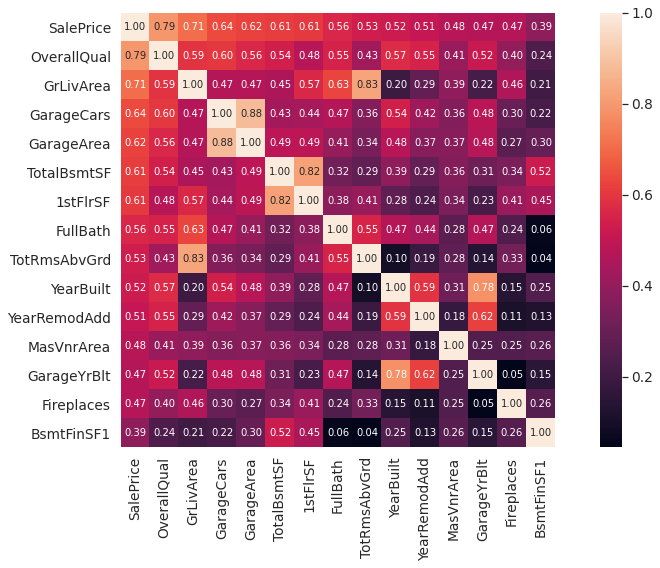

In [296]:
#matriz de correlação
k=15
plt.figure(figsize=(16,8))
corrmat=train.corr()
#top 15 correlações
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [297]:
train=train[cols]

In [298]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [299]:
test=test[cols.drop('SalePrice')]

In [300]:
print(test.isnull().sum().sort_values(ascending=False).head(20))

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64


In [301]:
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())

In [302]:
print(test.isnull().sum().sort_values(ascending=False).head(20))

BsmtFinSF1      0
Fireplaces      0
GarageYrBlt     0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64


##4. Modelo preditivo

In [303]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train.drop('SalePrice',axis=1),train['SalePrice'],test_size=0.3,random_state=101)

In [304]:
ytrain=ytrain.values.reshape(-1,1)
ytest=ytest.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.fit_transform(xtest)
ytrain=sc_y.fit_transform(ytrain)
ytest=sc_y.fit_transform(ytest)

In [305]:
xtrain

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

In [306]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [307]:
lm.fit(xtrain,ytrain)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


##5. Avaliar modelo preditivo

In [310]:
#Intercept
print(lm.intercept_)

[6.60022817e-17]


In [311]:
#Coeficiente
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


##6. Predições

###Regressão

In [312]:
predictions=lm.predict(xtest)
predictions=predictions.reshape(-1,1)

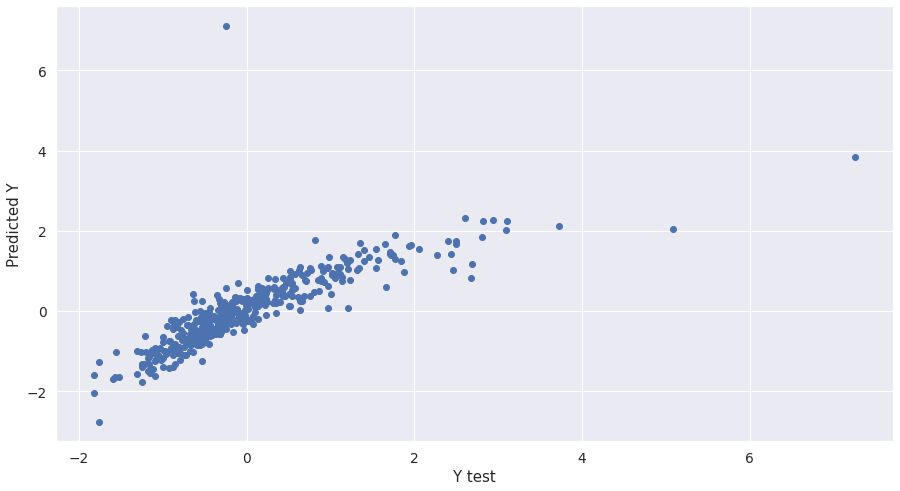

In [313]:
plt.figure(figsize=(15,8))
plt.scatter(ytest,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

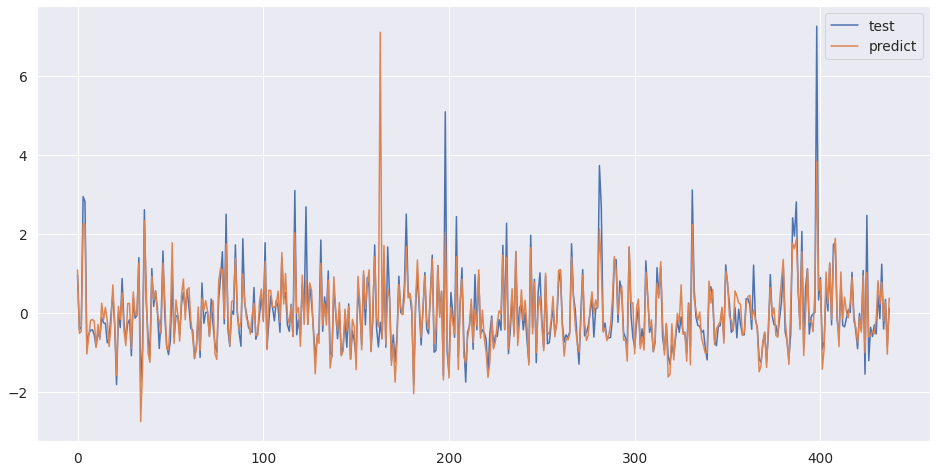

In [314]:
plt.figure(figsize=(16,8))
plt.plot(ytest,label='test')
plt.plot(predictions,label='predict')
plt.legend(loc='best')
plt.show()

###Gradient Boosting

In [315]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(ytest,predictions))
print('MSE:',metrics.mean_squared_error(ytest,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,predictions)))

MAE: 0.29105407971784336
MSE: 0.29995756024517584
RMSE: 0.5476838141164807


In [316]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error,r2_score

In [317]:
params={'n_estimators':100,'max_depth':4,'min_samples_split':2,'learning_rate':0.05,'loss':'ls'}
clf=ensemble.GradientBoostingRegressor(**params)
clf.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [318]:
clf_pred=clf.predict(xtest)
clf_pred=clf_pred.reshape(-1,1)

In [319]:
print('MAE:',metrics.mean_absolute_error(ytest,clf_pred))
print('MSE:',metrics.mean_squared_error(ytest,clf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,clf_pred)))

MAE: 0.22984211232744534
MSE: 0.11618705962038689
RMSE: 0.3408622296770161


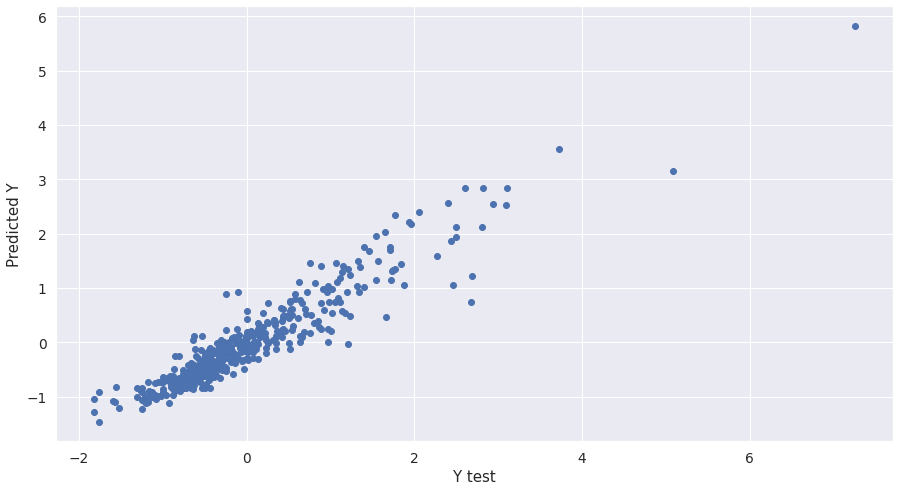

In [320]:
plt.figure(figsize=(15,8))
plt.scatter(ytest,clf_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

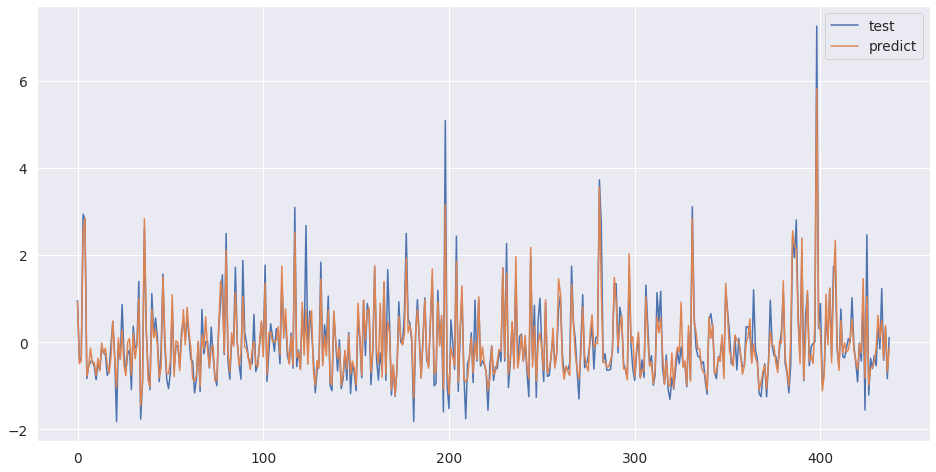

In [321]:
plt.figure(figsize=(16,8))
plt.plot(ytest,label='test')
plt.plot(clf_pred,label='predict')
plt.legend(loc='best')
plt.show()

###Decision Trees

In [322]:
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor(random_state=100)
dtreg.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [323]:
dtr_pred=dtreg.predict(xtest)
dtr_pred=dtr_pred.reshape(-1,1)

In [324]:
print('MAE:',metrics.mean_absolute_error(ytest,dtr_pred))
print('MSE:',metrics.mean_squared_error(ytest,dtr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,dtr_pred)))

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


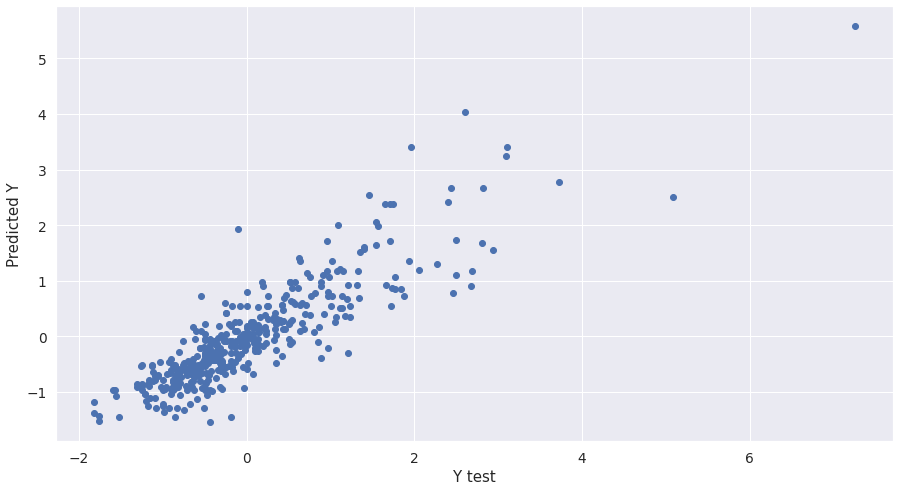

In [325]:
plt.figure(figsize=(15,8))
plt.scatter(ytest,dtr_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

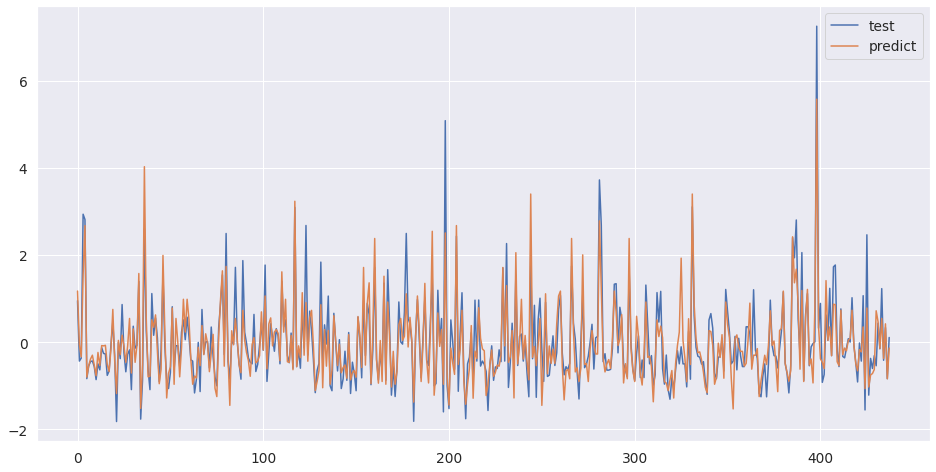

In [326]:
plt.figure(figsize=(16,8))
plt.plot(ytest,label='test')
plt.plot(dtr_pred,label='predict')
plt.legend(loc='best')
plt.show()

In [327]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [328]:
svrpred=svr.predict(xtest)
svrpred=svrpred.reshape(-1,1)

In [329]:
print('MAE:',metrics.mean_absolute_error(ytest,svrpred))
print('MSE:',metrics.mean_squared_error(ytest,svrpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,svrpred)))

MAE: 0.23401679589999025
MSE: 0.1899647870349416
RMSE: 0.43584950044131243


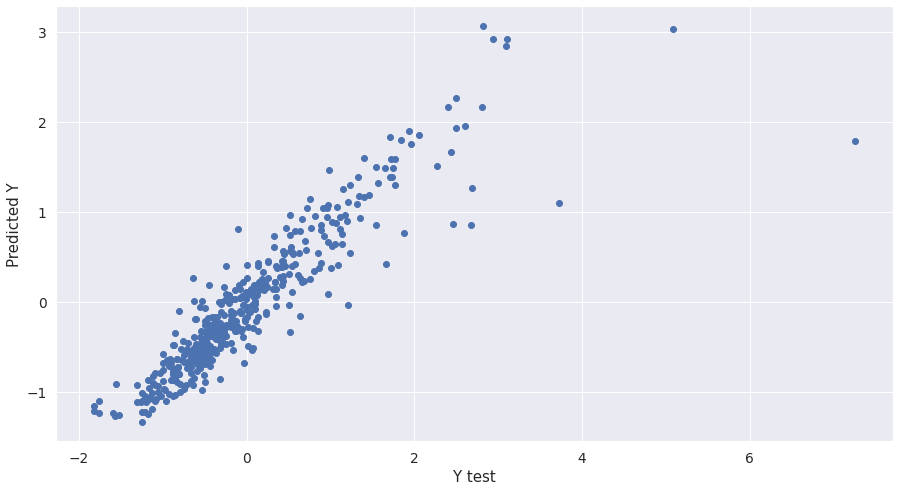

In [330]:
plt.figure(figsize=(15,8))
plt.scatter(ytest,svrpred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()

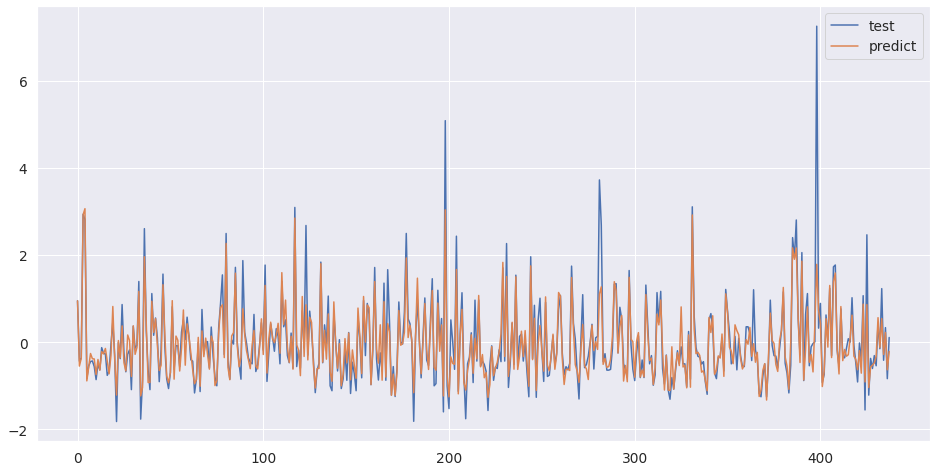

In [331]:
plt.figure(figsize=(16,8))
plt.plot(ytest,label='test')
plt.plot(svrpred,label='predict')
plt.legend(loc='best')
plt.show()

##7. Preparação para o envio


In [332]:
a=pd.read_csv('./test.csv')

In [333]:
test_id=a['Id']
a=pd.DataFrame(test_id,columns=['Id'])

In [334]:
test=sc_x.fit_transform(test)

In [335]:
test=pd.DataFrame(test)

In [336]:
testpredclf=clf.predict(test)
testpredclf=testpredclf.reshape(-1,1)

In [337]:
testpredclf=sc_y.inverse_transform(testpredclf)
testpredclf=pd.DataFrame(testpredclf,columns=['SalePrice'])

In [338]:
result=pd.concat([a,testpredclf],axis=1)
result.head()

,Id,SalePrice
0,1461,123320.996969
1,1462,138466.176565
2,1463,176409.694187
3,1464,183800.507401
4,1465,210311.549915


##8. Submission kaggle


In [339]:
result.to_csv('submit.csv',index=False)

In [340]:
! kaggle competitions submit -c house-prices-advanced-regression-techniques -f submit.csv -m "conpetition 3 by Fernanda"

100% 33.7k/33.7k [00:00<00:00, 94.6kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [341]:
! kaggle competitions submissions -c house-prices-advanced-regression-techniques

fileName    date                 description                status    publicScore  privateScore  
----------  -------------------  -------------------------  --------  -----------  ------------  
submit.csv  2021-06-12 17:10:22  conpetition 3 by Fernanda  complete  0.15514      None          
